In [1]:
import h5py
import pandas as pd
import numpy as np
import tensorflow as tf
from tqdm import tqdm_notebook as tqdm

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import _pickle
y_vocab = _pickle.load(open('./data/y_vocab.py3.cPickle', 'rb'))
y_vocab['43>109>1576>-1']
print(len(y_vocab))

4215


In [3]:
y_vocab.items()

dict_items([('14>13>235>-1', 0), ('51>545>-1>-1', 1), ('28>47>1356>-1', 2), ('30>195>2378>-1', 3), ('56>503>3179>227', 4), ('54>551>3149>-1', 5), ('30>273>512>-1', 6), ('34>409>1340>-1', 7), ('2>66>685>-1', 13), ('25>435>1906>-1', 10), ('43>109>1576>-1', 11), ('40>100>951>-1', 14), ('35>68>1782>-1', 15), ('37>159>1155>-1', 17), ('13>293>3123>-1', 18), ('28>86>167>-1', 19), ('15>268>818>-1', 3517), ('34>439>2696>-1', 20), ('11>151>1478>-1', 21), ('44>175>2432>-1', 24), ('11>220>1617>-1', 23), ('23>246>-1>-1', 27), ('44>437>2441>-1', 28), ('12>234>420>50', 29), ('24>204>890>-1', 31), ('44>175>2136>-1', 33), ('51>240>2905>-1', 34), ('56>495>2600>227', 2084), ('41>249>2118>-1', 35), ('16>19>472>-1', 36), ('17>179>465>-1', 37), ('28>47>57>-1', 38), ('10>476>3148>-1', 39), ('23>411>1373>-1', 41), ('41>318>1490>269', 43), ('9>51>546>-1', 44), ('25>32>1655>181', 12), ('22>27>716>-1', 995), ('8>214>782>-1', 47), ('56>504>2645>227', 2780), ('1>336>2422>-1', 49), ('10>476>2213>-1', 50), ('24>73>9

In [4]:
token_to_cate = {}
for it in y_vocab.items():
     token_to_cate[it[1]] = it[0]

# word preprocess

In [5]:
from myUtils.myUtils import *

In [6]:
# for training
path = './data_org/train.chunk.09'
# path = './data_org/train.chunk.03'

h = h5py.File(path,'r')
[i.decode('utf8') for i in h['train']['product'][:10] ]

['단풍나무 병풍 디자인 벽 시계 인테리어 그림 저소음',
 '[SB몰]ital. Tasche Damentasche Handtasche Tragetasche Ledertasche Echt Leder T39, Przise Farbe:Schwarz',
 '세탁기 급수호스 2M 스프레이호스 호수 호스연결 세차',
 '[행사기간] 롱임팩소켓(롱임팩복스알) 3/4인찌(19mm) 38mm (GENIUS-지니어스) //!!',
 '070-7591-8289 신도림웨딩홀 칠순화환 근처화원',
 '[휘슬러] 머그컵(2p)/ 수저세트(2인용) /이지조리도구 - 이지 서빙스푼',
 '필립스 FS9185 수염정리기',
 '이야코 동물나라 백곰양초 -38871',
 '땡큐샵 뉴 스포츠물병 450ml 도매가',
 '[해외]Scrapbook Customs Themed Paper & Stickers Scrapbook Kit, London City Memories 키트']

In [7]:
%%time
ht = Reader(path)
df = ht.makeDF(0, 1000000, mode="train")


Wall time: 1.59 s


In [8]:
# training에서만 셔플해야함!!
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,bcateid,brand,dcateid,maker,mcateid,model,pid,price,product,scateid,updttm,img_feat
0,3,,8,YAN,3,,J4548985565,-1,갤럭시A5 2017 핑크북극곰 투명 젤리케이스 A520,38,20180317074426,"[0.0, 0.1897483, 0.0, 0.68550116, 0.0, 0.02532..."
1,12,네파,-1,(주)네파,234,,J4464030913,84740,[네파]남성 유니온 집업티셔츠 - 7D15432,-1,20180305144750,"[0.04337274, 4.3381414, 0.0, 0.026368253, 0.42..."
2,20,CHOCOGEM,-1,초코젬,174,TMB9096,H1957379832,9900,[초코젬/CHOCOGEM] 빈티지 타슬 와펜 브로치(2623277),269,20180301044807,"[0.0, 1.3612474, 0.0, 0.092093475, 0.8262398, ..."
3,37,,-1,,156,,Y4218346861,-1,[카트남]Boodecal Large Bar Collage Salon Decals N...,638,20180405193626,"[0.18510018, 0.65060204, 0.043624684, 0.001301..."
4,50,,-1,기타,201,기타,W4583080760,-1,치킨라이스껌 본 5p 애완용품 애견간식 애견껌 강,-1,20180325101949,"[0.049563583, 0.66256773, 1.1538415, 0.1705180..."


In [9]:
# df.to_csv('small_kakao.csv')
# df2 = pd.read_csv('small_kakao.csv', encoding='utf-8')

In [9]:
df.loc[0, 'product'].split(' ')

['갤럭시A5', '2017', '핑크북극곰', '투명', '젤리케이스', 'A520']

In [10]:
from collections import Counter
import re

In [54]:
# re.sub(r'[^\w]', ' ', df.iloc[0,1])
vocab = Counter()
for i in zip(df['product'], df['model'], df['brand'], df['maker']):
    tmp = re.sub(r'[^\w]', ' ', str.join(' ', i))
    vocab.update(tmp.split())
    
len(vocab)

In [55]:
vocab.most_common(100)

[('기타', 157035),
 ('인터파크', 52777),
 ('주', 48997),
 ('참조', 27846),
 ('상품상세설명', 24464),
 ('여성', 23144),
 ('바보사랑', 23013),
 ('아디다스', 19475),
 ('아트박스', 19420),
 ('남성', 18045),
 ('롯데백화점', 16475),
 ('현대백화점', 15710),
 ('하프클럽', 15575),
 ('티셔츠', 14470),
 ('블랙', 13654),
 ('청구할인', 12654),
 ('라디오사', 12631),
 ('현대Hmall', 12372),
 ('꾸밈', 12109),
 ('6', 11539),
 ('나이키', 11368),
 ('오가닉맘', 10843),
 ('14K', 10841),
 ('1', 10668),
 ('POOM', 10563),
 ('무료배송', 9409),
 ('팬츠', 9325),
 ('케이스', 9285),
 ('S', 9253),
 ('신한', 9145),
 ('5', 8906),
 ('원피스', 8731),
 ('해당없음', 8588),
 ('탠디', 8225),
 ('갤러리아', 7927),
 ('없음', 7786),
 ('2', 7785),
 ('1300K', 7748),
 ('귀걸이', 7456),
 ('오가게', 7410),
 ('목걸이', 7215),
 ('니트', 7195),
 ('후추통', 7084),
 ('LF', 7076),
 ('셔츠', 7013),
 ('화이트', 6756),
 ('빌리버스', 6734),
 ('패션플러스', 6638),
 ('정품', 6565),
 ('세트', 6503),
 ('AK플라자', 6502),
 ('3', 6500),
 ('자켓', 6422),
 ('상세설명참조', 6376),
 ('신세계백화점', 6141),
 ('네이비', 5972),
 ('스트라이프', 5807),
 ('블루', 5631),
 ('체크', 5576),
 ('삼성전자', 5483),
 ('보리보리

### char cnn

In [11]:
vocab = Counter()
for i in zip(df['product'], df['model'], df['brand'], df['maker']):
#     tmp = re.sub(r'[^\w]', ' ', str.join(' ', i))/
    tmp = list(''.join(i))
    vocab.update(tmp)
    
len(vocab) # 한 4000정도로 잡으면 될듯

2468

In [12]:
vocab.most_common(100)

[(' ', 961771),
 ('/', 157262),
 ('e', 150836),
 ('0', 145449),
 ('스', 118092),
 ('1', 113876),
 ('a', 113806),
 ('이', 107046),
 ('o', 102501),
 ('기', 99944),
 ('r', 96482),
 ('i', 96208),
 ('n', 84989),
 ('타', 83436),
 ('l', 83182),
 ('t', 82978),
 ('2', 81329),
 ('S', 74263),
 ('(', 73587),
 (')', 73089),
 ('s', 70395),
 ('[', 67792),
 (']', 67664),
 ('5', 67632),
 ('트', 64286),
 ('3', 62409),
 ('상', 61306),
 ('리', 58414),
 ('m', 55938),
 ('-', 55871),
 ('A', 55670),
 ('세', 53518),
 ('C', 52885),
 ('c', 51817),
 ('4', 48215),
 ('M', 47677),
 ('인', 47138),
 ('P', 46860),
 ('B', 46053),
 ('L', 42834),
 ('T', 41419),
 ('7', 41198),
 ('6', 41096),
 ('아', 41063),
 ('8', 39962),
 ('드', 39907),
 ('품', 39717),
 ('조', 39715),
 ('크', 39702),
 ('E', 39504),
 ('u', 38064),
 ('d', 37237),
 ('D', 36490),
 ('h', 35880),
 ('라', 35481),
 ('g', 34358),
 ('지', 32393),
 ('터', 31395),
 ('R', 31136),
 ('O', 31049),
 ('참', 30522),
 ('9', 30282),
 ('용', 30213),
 ('p', 30180),
 ('명', 30110),
 ('N', 29375),
 

## for more training with other data chunk

In [48]:
%%time
from collections import Counter
import re

path = './data_org/train.chunk.09'

h = h5py.File(path,'r')
print([i.decode('utf8') for i in h['train']['product'][:10] ])

ht = Reader(path)
df = ht.makeDF(0, 500000, mode="train")

df = df.sample(frac=1).reset_index(drop=True)

# 664848
# 일단 트레이닝 단어 갯수에 맞춰야 모델이 안변함
vocab = np.zeros(664848)
len(vocab) 

['단풍나무 병풍 디자인 벽 시계 인테리어 그림 저소음', '[SB몰]ital. Tasche Damentasche Handtasche Tragetasche Ledertasche Echt Leder T39, Przise Farbe:Schwarz', '세탁기 급수호스 2M 스프레이호스 호수 호스연결 세차', '[행사기간] 롱임팩소켓(롱임팩복스알) 3/4인찌(19mm) 38mm (GENIUS-지니어스) //!!', '070-7591-8289 신도림웨딩홀 칠순화환 근처화원', '[휘슬러] 머그컵(2p)/ 수저세트(2인용) /이지조리도구 - 이지 서빙스푼', '필립스 FS9185 수염정리기', '이야코 동물나라 백곰양초 -38871', '땡큐샵 뉴 스포츠물병 450ml 도매가', '[해외]Scrapbook Customs Themed Paper & Stickers Scrapbook Kit, London City Memories 키트']
Wall time: 1.81 s


# make simple model

In [13]:
import numpy as np
# from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import mmh3

In [58]:
# word to id
seq_len = 30

data_x = []
for i in tqdm(list(zip(df['product'], df['model'], df['brand'], df['maker']))):
    sentence = re.sub(r'[^\w]', ' ', str.join(' ', i)).split(' ')
    sentence = set(filter(None, sentence))
    # hash --> word to id
    word_ids = [mmh3.hash(word, seed=2018)%(len(vocab)+1) for word in sentence][:seq_len]
    word_ids = np.pad(word_ids, (0,seq_len-len(word_ids)), 'constant', constant_values=(0))
    data_x.append(word_ids)
    

A Jupyter Widget

In [59]:
#  merge image + bcate 
# data_x = np.append(data_x, data_b, axis=1)
# data_x = np.append(data_x, data_m, axis=1)
data_x = np.array(data_x, dtype=np.int32)

In [60]:
%%time
# y-label to one-hot encoding

data_y=[]
for cate in tqdm(zip(df['bcateid'],df['mcateid'],df['scateid'],df['dcateid'])):
    tmp = str(cate[0])+'>'+str(cate[1])+'>'+str(cate[2])+'>'+str(cate[3])
    data_y.append(y_vocab[tmp])

output_dim = len(y_vocab) # 4215개
y_tmp = np.zeros([len(data_y), output_dim])
y_tmp[np.arange(len(data_y)), data_y] = 1
data_y = y_tmp

print(data_y.shape)

A Jupyter Widget


(500000, 4215)
Wall time: 2.04 s


In [61]:
print(data_x.shape, data_y.shape)

(500000, 30) (500000, 4215)


In [62]:
# split data set
test_ratio = 0.1
val_ratio = 0.01
train_ratio = 1-test_ratio-val_ratio

d_len = len(data_x)
train_end = int(d_len*train_ratio)
test_end = int(d_len*(train_ratio+test_ratio))

X_train = data_x[:train_end]
Y_train = data_y[:train_end]

X_test = data_x[train_end:test_end]
Y_test = data_y[train_end:test_end]

X_val = data_x[test_end:]
Y_val = data_y[test_end:]

print(len(X_train), len(X_val), len(X_test))

445000 5000 50000


In [19]:
"""#  메모리 이슈 있음 ... 코드 바꾸기
# split test set 20%
X_train, X_test, Y_train, Y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=3)

# split validation set 5%
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.01, random_state=3)

print(len(X_train), len(X_val), len(X_test))"""

In [63]:
# 피처 데이터, 레이블, 미니배치 갯수, random sampling
import random
def getMiniBatch2(x, y, n):
    if len(x) != len(y):
        print('Feature and label num is not equal.')
        return
    rand_idx = random.sample(list(range(len(x))), n)
    x_ = [x[i] for i in rand_idx]
    y_ = [y[i] for i in rand_idx]
    return np.array(x_), np.array(y_)

In [64]:
getMiniBatch2(X_train, Y_train, 10)

(array([[294652, 608411, 326515, 112022, 159554,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0],
        [569835, 197336, 469670, 554789, 402286, 182296, 291803, 427791,
         507486, 190628,  76239, 468941,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0],
        [ 97022,  74509, 218646, 527522, 521764, 437009, 547509, 440854,
              0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0],
        [416229,  93454, 590177, 282580, 664667, 167055,  57454, 455296,
              0,      0,      0,      0,      0,      0,      0,      0,
              0,      0

In [70]:
# make DAG
tf.reset_default_graph()
tf.set_random_seed(777)

# train Parameters
# seq_len = 35
output_dim = 4215 # 1번 트레이닝셋만

epoch = 10
batch_size = 1024
vocabulary_size = len(vocab)
embedding_size = 256


# =============================================================================

Y = tf.placeholder(tf.int16, [None, output_dim], name="label")
lr = tf.placeholder(tf.float32, [], name='learning_rate')
keep_prob = tf.placeholder(tf.float32, [], name="keep_prob")

#  embedding
X = tf.placeholder(tf.int32, [None, seq_len], name="word_tokens") 
word_embeddings = tf.get_variable("word_embeddings",
    [vocabulary_size, embedding_size], initializer=tf.contrib.layers.xavier_initializer())
embedded_word_ids = tf.nn.embedding_lookup(word_embeddings, X) # batch * seq * embeddding

"""
#  dropout layer
def _sequence_dropout(step_inputs, keep_prob):
        # apply dropout to each input
        # input : a list of input tensor which shape is [None, input_dim]
        with tf.name_scope('sequence_dropout') as scope:
            step_outputs = []
            for t, _input in enumerate(step_inputs):
                step_outputs.append( tf.nn.dropout(_input, keep_prob) )
        return step_outputs

embedded_word_ids = tf.unstack(embedded_word_ids, axis=1)
step_inputs = _sequence_dropout(embedded_word_ids, keep_prob) # seq * batch * embedding

#  FCN layer
doc_mean = tf.reduce_mean(step_inputs, axis=0) # batch * embedding (mean)
# hint = tf.placeholder(tf.float32, [None, 609], name='hint') # previous category
# bf_lenear = tf.concat([doc_mean, hint], axis=1) # batch * (embediing + hint)
# bf_lenear = tf.nn.dropout(bf_lenear, keep_prob)
"""

embedded_word_ids = tf.reshape(embedded_word_ids, [-1, seq_len, embedding_size, 1])
# CNN layer
# kernel size 3
F1 = tf.get_variable('3gram-filter', [3, embedding_size, 1, 150], 
                     initializer=tf.contrib.layers.xavier_initializer()) # (row, column, channel, kernels)
L1 = tf.nn.conv2d(embedded_word_ids, F1, strides=[1, 1, 1, 1], padding='VALID')
L1 = tf.nn.tanh(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, seq_len-2, 1, 1],
                    strides=[1, 1, 1, 1], padding='VALID')

# kernel size 4
F2 = tf.get_variable('4gram-filter', [4, embedding_size, 1, 150], 
                     initializer=tf.contrib.layers.xavier_initializer()) # (row, column, channel, kernels)
L2 = tf.nn.conv2d(embedded_word_ids, F2, strides=[1, 1, 1, 1], padding='VALID')
L2 = tf.nn.tanh(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, seq_len-3, 1, 1],
                    strides=[1, 1, 1, 1], padding='VALID')

# kernel size 5
F3 = tf.get_variable('5gram-filter', [5, embedding_size, 1, 150], 
                     initializer=tf.contrib.layers.xavier_initializer()) # (row, column, channel, kernels)
L3 = tf.nn.conv2d(embedded_word_ids, F3, strides=[1, 1, 1, 1], padding='VALID')
L3 = tf.nn.tanh(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, seq_len-4, 1, 1],
                    strides=[1, 1, 1, 1], padding='VALID')

L_flat = tf.concat([L1, L2, L3], 3) # (?, 1, 1, 150*3)
L_flat = tf.reshape(L_flat, [-1, 3 * 150]) # (?, 150*3)

# 오캄의 면도날... 굳이 없어도 되는 레이어인듯
# L_linear = tf.contrib.layers.fully_connected(L_flat, 512, activation_fn=tf.nn.relu)
# L_linear = tf.nn.dropout(L_linear, keep_prob)
L_linear = tf.nn.dropout(L_flat, keep_prob)


# Y_pred = tf.contrib.layers.fully_connected(bf_lenear, output_dim, activation_fn=tf.nn.relu)  # We use the last cell's output
Y_pred = tf.contrib.layers.fully_connected(L_linear, output_dim, activation_fn=None)  # We use the last cell's output

# # image feature
# X = tf.placeholder(tf.float32, [None, len(data_x[0])], name="img_feat")
# X = tf.nn.dropout(X, keep_prob)
# Y_pred = tf.contrib.layers.fully_connected(X, output_dim,
#                                            activation_fn=tf.nn.relu, weights_initializer=tf.contrib.layers.xavier_initializer())  # We use the last cell's output

# optimize
cost =tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=Y_pred, labels=Y, name='cross_entropy'))
optimizer = tf.train.AdamOptimizer(lr)
train_step = optimizer.minimize(cost)

# prediction
predicted = tf.argmax(Y_pred, 1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, tf.argmax(Y, 1)), dtype=tf.float32))

# saver
name_to_var_map = {var.op.name: var for var in tf.global_variables()}
saver = tf.train.Saver(name_to_var_map, name='my_saver')

# train/save

In [71]:
%%time 

if 'sess' in globals(): sess.close()
sess = tf.InteractiveSession(config=tf.ConfigProto(log_device_placement=True))
sess.run(tf.global_variables_initializer())

x_range=[]
train_accuracies=[]
val_accuracies=[]
val_costs=[]
ckpt_path = './small_model/small'
lr_start = 0.002
iter_per_epoch = int(len(data_y)/batch_size)

print('total iter is %d * %d' %(epoch, iter_per_epoch))
for e in range(epoch):
    print('********** %d epoch started: lr-%g **********'%(e, lr_start))
    for i in range(iter_per_epoch):
        X_, Y_ = getMiniBatch2(X_train, Y_train, batch_size) # 랜덤 미니배치 할당
        train_step.run(feed_dict={X:X_, Y:Y_, lr:lr_start, keep_prob:0.5})

    #   아래에 결과 프린트용
        if i % 100 == 0:   
            train_accuracy = accuracy.eval(feed_dict={X:X_, Y:Y_, lr:lr_start, keep_prob:0.5})
            val_accuracy, val_cost = sess.run([accuracy, cost], feed_dict={X:X_val, Y:Y_val, keep_prob:1})

            if lr_start>0.0001:
                lr_start = lr_start*0.995 # lr annealing
            
            train_accuracies.append(train_accuracy)
            val_accuracies.append(val_accuracy)
            val_costs.append(val_cost)
            x_range.append(i+ iter_per_epoch*e)
            print('step %d: acc_tr %g, acc_val %g, cost_val %g' % (i, train_accuracy, val_accuracy, val_cost))
        
    saver.save(sess, ckpt_path, global_step=i+ iter_per_epoch*e)

total iter is 10 * 488
********** 0 epoch started: lr-0.002 **********
step 0: acc_tr 0.0566406, acc_val 0.0176, cost_val 8.34388
step 100: acc_tr 0.0761719, acc_val 0.0796, cost_val 5.76623
step 200: acc_tr 0.313477, acc_val 0.2974, cost_val 3.96916
step 300: acc_tr 0.530273, acc_val 0.4726, cost_val 2.79582
step 400: acc_tr 0.637695, acc_val 0.5608, cost_val 2.23171
********** 1 epoch started: lr-0.0019505 **********
step 0: acc_tr 0.713867, acc_val 0.601, cost_val 1.95323
step 100: acc_tr 0.773438, acc_val 0.6314, cost_val 1.78577
step 200: acc_tr 0.813477, acc_val 0.654, cost_val 1.65426
step 300: acc_tr 0.84668, acc_val 0.6686, cost_val 1.58832
step 400: acc_tr 0.867188, acc_val 0.6776, cost_val 1.53542
********** 2 epoch started: lr-0.00190222 **********
step 0: acc_tr 0.883789, acc_val 0.6844, cost_val 1.5148
step 100: acc_tr 0.916016, acc_val 0.6906, cost_val 1.50106
step 200: acc_tr 0.925781, acc_val 0.691, cost_val 1.48539
step 300: acc_tr 0.942383, acc_val 0.6944, cost_val 1

KeyboardInterrupt: 

# get accuracy for dev set

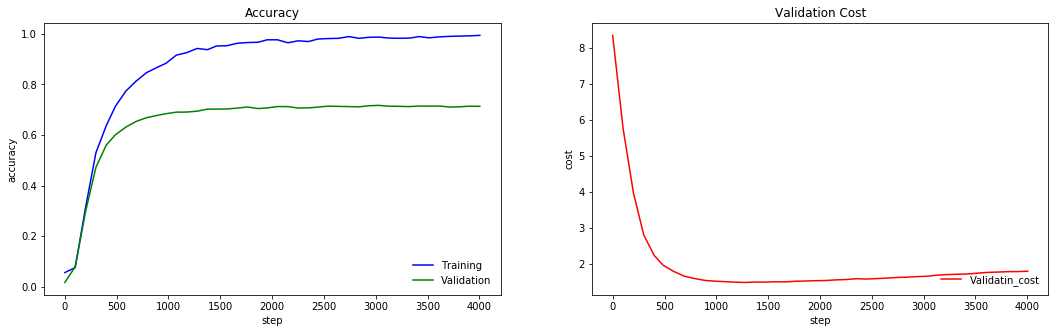

In [72]:
plt.figure(figsize=(18,5))
plt.subplot(121)
plt.plot(x_range, train_accuracies,'-b', label='Training')
plt.plot(x_range, val_accuracies,'-g', label='Validation')
plt.legend(loc='lower right', frameon=False)
# plt.ylim(ymax = 1.1, ymin = 0.7)
plt.ylabel('accuracy')
plt.xlabel('step')
plt.title('Accuracy')

plt.subplot(122)
plt.plot(x_range, val_costs,'-r', label='Validatin_cost')
plt.legend(loc='lower right', frameon=False)
# plt.ylim(ymax = 1.1, ymin = 0.7)
plt.ylabel('cost')
plt.xlabel('step')
plt.title('Validation Cost')
plt.show()

# Inference

In [19]:
# restore model
if 'sess' in globals(): sess.close()
sess = tf.InteractiveSession()

ckpt_path = './small_model/small'
saver.restore(sess, ckpt_path+'-2439')

INFO:tensorflow:Restoring parameters from ./small_model/small-2439


In [73]:
from math import ceil

# 여기서도 OOM 날수 있다
acc_tot = []
cost_tot = []
cate_predicted = []
chunk_size = 10000 # OOM 방지
iter_num = ceil(len(Y_test)/chunk_size)

for i in range(iter_num):
    test_accuracy, test_cost, tokens = \
        sess.run([accuracy, cost, predicted], feed_dict={X:X_test[chunk_size*i:chunk_size*(i+1)], Y:Y_test[chunk_size*i:chunk_size*(i+1)], keep_prob:1})
    acc_tot.append(test_accuracy)
    cost_tot.append(test_cost)
    
    for tok in tokens:
        cate_predicted.append(token_to_cate[tok].split('>'))
    print('Test Accuracy: %g \tTest cost: %g' %(test_accuracy, test_cost))
    
print('Total Accuracy:', np.array(acc_tot).mean(), '\tTotal Cost:', np.array(cost_tot).mean())

Test Accuracy: 0.7058 	Test cost: 1.81617
Test Accuracy: 0.7089 	Test cost: 1.79216
Test Accuracy: 0.7098 	Test cost: 1.76239
Test Accuracy: 0.7135 	Test cost: 1.79474
Test Accuracy: 0.7125 	Test cost: 1.81981
Total Accuracy: 0.7101 	Total Cost: 1.7970511


In [74]:
# 분류 계층별 정확도 보기

# 나누기
cate_ans = []
for i in np.argmax(Y_test, axis=1):
    cate_ans.append(token_to_cate[i].split('>'))


cate_predicted = np.array(cate_predicted)
cate_ans = np.array(cate_ans)

# df_cate = pd.DataFrame(cate_predicted, columns=['bcateid', 'mcateid', 'scateid', 'dcateid'])
# 계산하기
cols=['bcateid', 'mcateid', 'scateid', 'dcateid']
aws_list = cate_ans.transpose([1,0]) == cate_predicted.transpose([1,0])

for i, aws in enumerate(aws_list):
    _sum = np.sum(aws)
    acc = _sum/len(aws)
    print('%s: %g \t %d/%d' %(cols[i], acc, _sum, len(aws)))
print('아직 결측치 보정은 안함')

bcateid: 0.90324 	 45162/50000
mcateid: 0.8255 	 41275/50000
scateid: 0.71694 	 35847/50000
dcateid: 0.95254 	 47627/50000
아직 결측치 보정은 안함


In [62]:
# 결측치 보정
sid = Counter(df['scateid'])
sratio = (len(df['scateid']) - sid.get(-1))/len(df['scateid'])
np.array(acc_tot).mean()/sratio

0.7073726530058878

---
0.002 --> 0.86 어닐링 없이
 - 최고 정확도

### 할일
- 텐서보드 붙이기
- ~~모델 저장하기~~
- ~~이니셜라이저 사용~~
- 4가지 레이블 맞추기
    - 점수 제작 코드
- ~~대분류당 중분류 중복 안되는지~~
    - 패턴먼저 파악하기
    - 중복 안되면 강제로 CRF적용가능
    - 중복 안됨
- 모듈화
    - myUtils.py 에 정리하기
    
---
데이터가 1,2와 3이 많이 다르네
 - 훈련 지속할 파이프라인 구축이 우선
 - 배치놈 반드시 필요할듯
    